In [40]:
library(Signac)
library(Seurat)
library(ggplot2)
library(dplyr)
library(EnsDb.Mmusculus.v79)
library(viridis)
set.seed(1234)

source('../scripts/plotting.R')

In [41]:
# filtered snATAC output from Signac
get_filt_atac <- function() {
    load('../processing/signac/sn_filt.rda')
    obj = mb_mt_atac
    return(obj)
}

# RNA + ATAC integration 
get_rna_atac <- function() {
    load('../processing/signac/atac_rna_integrated.rda')
    transfer.anchors = transfer.anchors
    return(transfer.anchors)
}

# unfiltered 40k cell dataset output from Seurat
get_40k_sc_data <- function() {
    load('../processing/seurat/sc_40k.rda')
    seurat_obj = mb_mt
    return(seurat_obj)
}

### Panel S3B

pdf 
  2

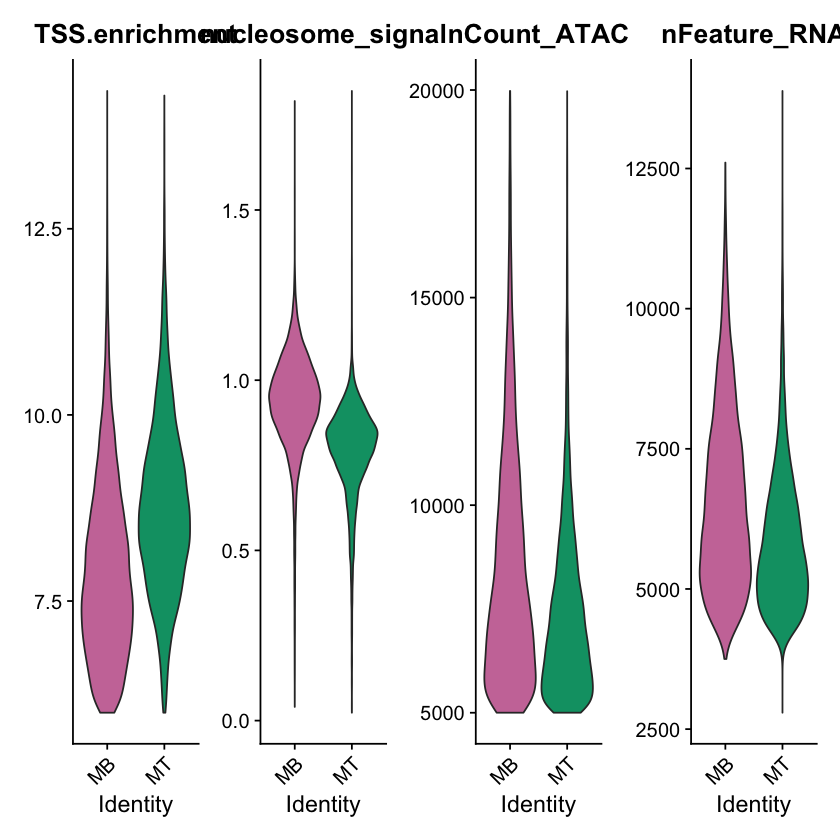

In [11]:
obj = get_filt_atac()
colors = get_atac_sample_colors()

fname="figures/qc_violin_snatac.pdf"
pdf(file=fname,
    width =  10, 
    height = 6)
p = VlnPlot(
  object = obj,
  features = c('TSS.enrichment', 'nucleosome_signal','nCount_ATAC','nFeature_RNA'),
  pt.size = 0,
  ncol = 4,
  group.by = "CellType",
  cols = colors)
p
dev.off()
p

### Panel S3C

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



pdf 
  2

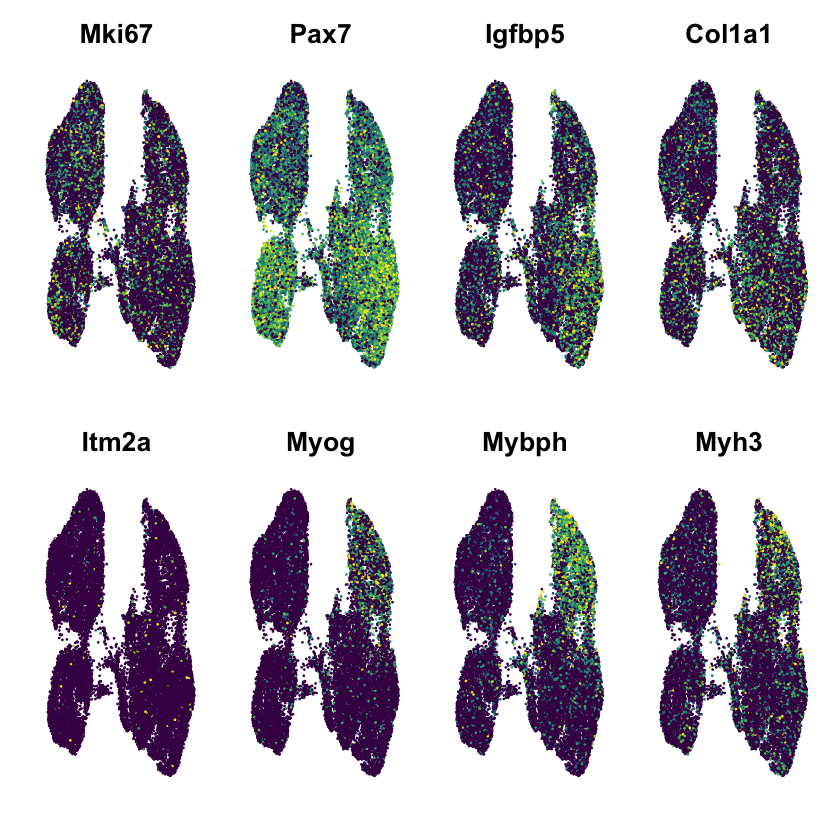

In [12]:
obj = get_filt_atac()

DefaultAssay(obj)="RNA"
genes = c("Mki67","Pax7","Igfbp5","Col1a1","Itm2a","Myog","Mybph","Myh3")
fname  = "figures/featureplots_snatac.pdf"
pdf(file=fname,
    width = 7.8, 
    height = 4)
p = FeaturePlot(obj, order=F, pt.size = 0.1,
            features = genes,ncol =4,
            max.cutoff = 'q95') & NoLegend() & NoAxes() & 
  scale_colour_gradientn(colours = viridis(11))
p
dev.off()
p

### Panel S3D

In [34]:
mb_mt = get_40k_sc_data()
transfer = get_rna_atac()
mb_mt_atac = get_filt_atac()
colors = get_atac_sample_colors()

mb_mt@meta.data$grouped_clusters  = mb_mt@meta.data$final_clusters_ordered 
Idents(mb_mt) = mb_mt@meta.data$grouped_clusters
mb_mt=RenameIdents(mb_mt,
                   '1'='MB', 
                   '2'='MB',
                   '3'='MB',
                   '4'='MB',
                   '5'='MB',
                   '6'='MB',
                   '7'='MB',
                   '8'='MNC',
                   '9'='MNC',
                   '10'='MNC',
                   '11'='MNC',
                   '12'='MNC',
                   '13'='MNC',
                   '14'='MNC',
                   '15'='MNC',
                   '16'='MT',
                   '17'='MT',
                   '18'='MT',
                   '19'='MT',
                   '20'='MT')
mb_mt@meta.data$grouped_clusters = Idents(mb_mt) 
predicted.labels_celltype = TransferData(
  anchorset = transfer.anchors,
  refdata = mb_mt$CellType,
  weight.reduction = mb_mt_atac[['lsi']],
  dims = 4:30
)

# mb_mt_atac = UpdateSeuratObject(mb_mt_atac)
mb_mt_atac = AddMetaData(object=mb_mt_atac,
                         metadata=predicted.labels_celltype)

# # check if rownames are equivalent between prediction table & seurat obj
# all.equal(rownames(mb_mt_atac@meta.data), rownames(predicted.labels_celltype))

# # add prediction labels to the atac seurat obj metadata:
# for(meta in names(predicted.labels_celltype)){
#     mb_mt_atac@meta.data[[meta]] <- predicted.labels_celltype[,meta]
# }

fname="figures/atac_rna_integration_celltype.pdf"
pdf(file=fname,
    width=5.5,height=5)
p = DimPlot(mb_mt_atac,
        group.by = 'predicted.id',
        label = F,cols = colors) + NoLegend() + NoAxes()
p
dev.off()
p

colors = get_celltype_colors()
            
predicted.labels_3celltypes = TransferData(
  anchorset = transfer.anchors,
  refdata = mb_mt$grouped_clusters,
  weight.reduction = mb_mt_atac[['lsi']],
  dims = 4:30
)

mb_mt_atac = AddMetaData(object = mb_mt_atac, metadata = predicted.labels_3celltypes)
fname="figures/atac_rna_integration_3celltype.pdf"
pdf(file=fname,
    width=5.5,height=5)
p = DimPlot(mb_mt_atac,
        group.by = 'predicted.id',
        label = F,cols = colors) + NoLegend() + NoAxes()
p
dev.off()
p

Finding integration vectors

Finding integration vector weights

Predicting cell labels

Validating object structure

Updating object slots

Found more than one class "Assay" in cache; using the first, from namespace 'Seurat'

Also defined by 'SeuratObject'



ERROR: Error in `[[<-`(`*tmp*`, obj, value = UpdateSlots(object = object[[obj]])): [[<- defined for objects of type "S4" only for subclasses of environment


### Panel S3E

pdf 
  2

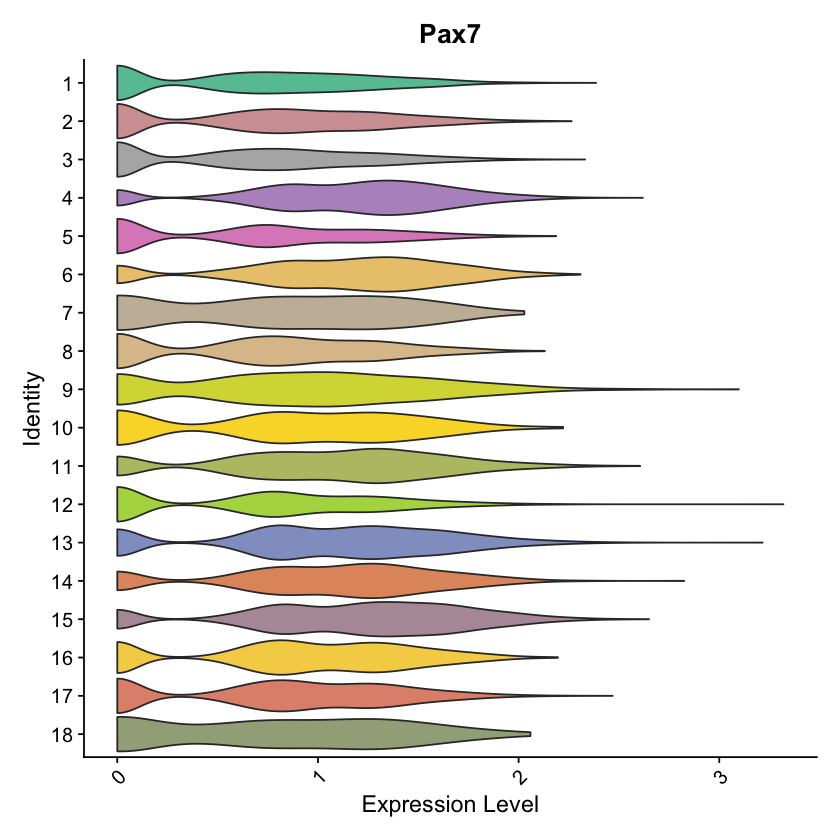

In [42]:
mb_mt_atac = get_filt_atac()
colors = get_atac_clust_colors()

pdf(file=fname,
    width=3,height=11)
p = VlnPlot(mb_mt_atac,
        pt.size = 0, cols = rev(colors),
       "Pax7",
       assay ="RNA",
       group.by = "final_clusters_ordered_reverse") + coord_flip() + NoLegend()
p
dev.off()
p

### Panel S3F

pdf 
  2

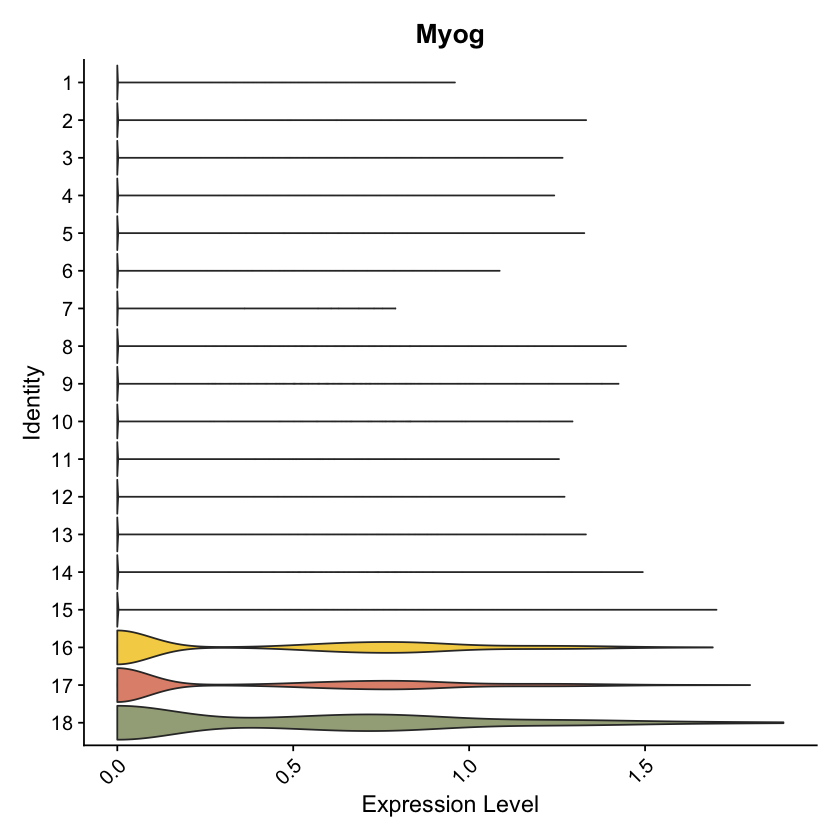

In [43]:
mb_mt_atac = get_filt_atac()
colors = get_atac_clust_colors()

fname="figures/atac_myog_violin.pdf"
pdf(file=fname,
    width=3,height=11)
p = VlnPlot(mb_mt_atac,
        pt.size = 0, cols = rev(colors),
        "Myog",
        assay ="RNA",
        group.by = "final_clusters_ordered_reverse") + coord_flip() + NoLegend()
p
dev.off()
p